In [1]:
import pandas as pd

# Load the dataset from the CSV file into df

file_path = 'IMDB Dataset.csv'
df = pd.read_csv(file_path)
##df = pd.read_csv(file_path)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


The `TfidfVectorizer` from the `sklearn.feature_extraction.text` module is a tool used to convert a collection of raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. Here is a summary of the parameters for this function based on the official documentation:

### Parameters

1. **input : {'filename', 'file', 'content'}, default='content'**
   - The format of the input data. If 'filename', the data is expected to be a list of file names. If 'file', the data is expected to be a list of file-like objects. If 'content', the input is expected to be a list of strings.

2. **encoding : str, default='utf-8'**
   - The character encoding to use for decoding the files or file-like objects. This is used only if the input is 'filename' or 'file'.

3. **decode_error : {'strict', 'ignore', 'replace'}, default='strict'**
   - Specifies what to do when a character decoding error is encountered. Options are 'strict' (raise an error), 'ignore' (skip the problematic characters), and 'replace' (replace them with a placeholder).

4. **strip_accents : {'ascii', 'unicode', None}, default=None**
   - Specifies whether to remove accents and perform other character normalization during text preprocessing. If 'ascii', removes accents by converting to ASCII. If 'unicode', removes accents by transforming Unicode characters into their base forms.

5. **lowercase : bool, default=True**
   - Whether to convert all characters to lowercase before tokenizing.

6. **preprocessor : callable, default=None**
   - A custom function to preprocess the text before tokenizing and vectorizing.

7. **tokenizer : callable, default=None**
   - A custom function to tokenize the text.

8. **analyzer : {'word', 'char', 'char_wb'}, callable, default='word'**
   - The type of analysis to perform. 'word' for word-level analysis, 'char' for character-level analysis, and 'char_wb' for character-level analysis within word boundaries.

9. **stop_words : {'english'}, list, default=None**
   - If 'english', a built-in stop word list for the English language is used. If a list, it should contain stop words to be removed from the text. If None, no stop words are removed.

10. **token_pattern : str, default=r'(?u)\b\w\w+\b'**
    - A regular expression to identify tokens.

11. **ngram_range : tuple (min_n, max_n), default=(1, 1)**
    - The range of n-values for different n-grams to be extracted. For example, (1, 2) means unigrams and bigrams.

12. **max_df : float or int, default=1.0**
    - When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold. If float, the parameter represents a proportion of documents. If int, it represents an absolute count.

13. **min_df : float or int, default=1**
    - When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. If float, the parameter represents a proportion of documents. If int, it represents an absolute count.

14. **max_features : int, default=None**
    - If not None, build a vocabulary that only includes the top max_features ordered by term frequency across the corpus.

15. **vocabulary : dict, default=None**
    - A mapping of terms to feature indices. If not provided, a vocabulary is determined from the input documents.

16. **binary : bool, default=False**
    - If True, all non-zero term frequencies are set to 1. This is useful for binary / boolean features.

17. **dtype : type, default=<class 'numpy.float64'>**
    - The type of the returned matrix.

18. **norm : {'l1', 'l2'}, default='l2'**
    - Each output row will have unit norm, either 'l1' or 'l2'.

19. **use_idf : bool, default=True**
    - Enable inverse-document-frequency reweighting.

20. **smooth_idf : bool, default=True**
    - Add one to document frequencies to smooth idf weights by preventing zero divisions.

21. **sublinear_tf : bool, default=False**
    - Apply sublinear tf scaling, i.e., replace tf with 1 + log(tf).

These parameters provide a wide range of options to customize the TF-IDF transformation to suit different text processing needs.

In [2]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [3]:
# Q1:
# Why is that impotent that both of the labels will have the same values?
# Because we want to have a balanced dataset, so the model will not be biased towards one of the classes.

In [4]:
# Preprocessing
# Convert the sentiment column to binary values
# Run value_counts() again to verify the conversion
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Preprocessing



df['sentiment'].value_counts()


0    25000
1    25000
Name: sentiment, dtype: int64

In [5]:
# Text Vectorization
# From from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer
# Load the tf idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html



In [15]:
tf = TfidfVectorizer(stop_words='english', max_features=1000)

all_params = tf.get_params()

print(f'Stop word list: {all_params["stop_words"]}')
print(f'Maximum number of features: {all_params["max_features"]}')

Stop word list: english
Maximum number of features: 1000


In [16]:
# Change the code to create a new instance of the tf idf vectorizer
# What is the correct value for stop_words?
# set the vectorizer to use the top 1000 features

all_params_vectorizer = vectorizer.get_params()
print(all_params_vectorizer['stop_words'])

print(all_params_vectorizer['max_features'])

NameError: name 'vectorizer' is not defined

In [17]:
# use the fit method to fit the vectorizer on the training data

tf.fit(df['review'])


TfidfVectorizer(max_features=1000, stop_words='english')

In [18]:
tf.vocabulary_
# print the type of the vocabulary attribute, using the type function
print(type(tf.vocabulary_))
print(list(tf.vocabulary_.keys())[:10])
# 

<class 'dict'>
['mentioned', 'watching', 'just', 'episode', 'll', 'right', 'exactly', 'happened', 'br', 'thing']


In [19]:
# # use the fit method to fit the vectorizer on the training data

# vocabulary = vectorizer.vocabulary_
# # print the type of the vocabulary attribute, using the type function
# # extract the keys of the vocabulary attribute using the keys() method
# # print the first 10 keys of the vocabulary attribute, you can use [:10] to slice the list

# ## print(type(vocabulary))
# ## print(list(vectorizer.vocabulary_.keys())[:10])

# print(type(vocabulary))
# print(list(vectorizer.vocabulary_.keys())[:10])


In [20]:
## Q2
# When running this code we get an error, what is the error and how can we fix it?

empty_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
# run the fit method on the vectorizer with an empty list
empty_vectorizer.fit(df['review'])
print(empty_vectorizer.vocabulary_)

{'mentioned': 556, 'watching': 953, 'just': 461, 'episode': 269, 'll': 513, 'right': 719, 'exactly': 278, 'happened': 390, 'br': 96, 'thing': 874, 'scenes': 742, 'violence': 937, 'set': 764, 'word': 974, 'sex': 767, 'classic': 146, 'use': 918, 'called': 110, 'given': 366, 'state': 826, 'city': 144, 'prison': 671, 'face': 289, 'high': 405, 'home': 412, 'death': 202, 'far': 305, 'away': 57, 'say': 737, 'main': 528, 'fact': 290, 'goes': 371, 'shows': 779, 'wouldn': 984, 'forget': 341, 'pretty': 669, 'audiences': 54, 'romance': 725, 'doesn': 232, 'mess': 557, 'saw': 736, 'couldn': 175, 'watched': 952, 'got': 376, 'kill': 466, 'order': 612, 'middle': 560, 'class': 145, 'turned': 905, 'lack': 478, 'street': 836, 'experience': 285, 'viewing': 935, 'touch': 890, 'wonderful': 973, 'little': 509, 'production': 677, 'old': 606, 'time': 881, 'gives': 367, 'sense': 758, 'entire': 267, 'piece': 639, 'actors': 17, 'extremely': 286, 'michael': 559, 'truly': 900, 'editing': 250, 'worth': 983, 'written'

In [21]:
# change the code to create a new instance of the tf idf vectorizer with the following parameters:
# max_features=10_000, stop_words='english'

new_vectorizer = TfidfVectorizer(max_features=10_000, stop_words='english')
new_vectorizer.fit(df['review'])

all_param_new_vectorizer = new_vectorizer.get_params()
print(all_param_new_vectorizer['max_features'])

10000


In [22]:
# You can use an assert statement to check if the value of a variable is equal to a certain value
# change the number 1234 to make sure that the the second assert statement passes

assert tf.get_params()['max_features'] == 1_000

## assert all_param_new_vectorizer['max_features'] == 10000
assert all_param_new_vectorizer['max_features'] == 10_000

assert all_param_new_vectorizer['max_features'] ==  10_000 # 5 + 7j

In [23]:
new_vectorizer.vocabulary_.keys()

dict_keys(['reviewers', 'mentioned', 'watching', 'just', 'oz', 'episode', 'll', 'hooked', 'right', 'exactly', 'happened', 'br', 'thing', 'struck', 'brutality', 'scenes', 'violence', 'set', 'word', 'trust', 'faint', 'hearted', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'hardcore', 'classic', 'use', 'called', 'given', 'maximum', 'security', 'state', 'focuses', 'mainly', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'face', 'high', 'agenda', 'em', 'home', 'muslims', 'christians', 'italians', 'irish', 'death', 'stares', 'dodgy', 'shady', 'far', 'away', 'say', 'main', 'appeal', 'fact', 'goes', 'shows', 'wouldn', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'mainstream', 'audiences', 'charm', 'romance', 'doesn', 'mess', 'saw', 'nasty', 'surreal', 'couldn', 'ready', 'watched', 'developed', 'taste', 'got', 'accustomed', 'levels', 'graphic', 'injustice', 'crooked', 'guards', 'sold', 'inmates', 'kill', 'order', 'mannered', 'middle', 'class', 'turned', 'lack', 'street',

In [24]:
# use the code from one of the previous cells
# to print the first 10 keys of the vocabulary attribute
# compare the output of the vectorizer and the new_vectorizer

# print(list(new_vectorizer.vocabulary_.keys())[:10])
# print(list(vectorizer.vocabulary_.keys())[:10])

print(list(new_vectorizer.vocabulary_.keys())[:10])
print(list(tf.vocabulary_.keys())[:10])



['reviewers', 'mentioned', 'watching', 'just', 'oz', 'episode', 'll', 'hooked', 'right', 'exactly']
['mentioned', 'watching', 'just', 'episode', 'll', 'right', 'exactly', 'happened', 'br', 'thing']


In [ ]:
## Q3
# What is the difference between the two vocabularies?
# one is the subset of the other, because the max_features is different, which effect the order of the words in the vocabulary
# Why are some of the words the same and some are different?
# because the the max_features is different, which effect the order of the words in the vocabulary

In [25]:
# Use the transform method to transform the first review in the dataset
# print the type of the output of the transform method using the type function
new_tf = TfidfVectorizer(max_features=10_00, stop_words='english')

string_of_the_first_review = df['review'].iloc[0] # add code to get the string of the first review
print(string_of_the_first_review)

new_tf.fit(df['review'])
words_sparse = new_tf.transform([string_of_the_first_review]) # use vectorize to transform string
print(type(words_sparse))

# # Convert the sparse matrix to a dense matrix using the toarray() method
# # print the shape of the dense matrix

words_dense = words_sparse.toarray()

# ## words_dense = words_sparse.toarray()
# words_dense = words_sparse.toarray()


print(words_dense.size)
print(words_sparse.size)

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [ ]:
# print(words_sparse)
# ['a', 'b'] + ['c']

In [ ]:
# Use the transform method to transform the first review in the dataset
# print the type of the output of the transform method using the type function
# string_of_the_first_review = # add code to get the string of the first review
# print(string_of_the_first_review)

# words_sparse = # use vectorize to transform string
# print(type(words_sparse))

# # Convert the sparse matrix to a dense matrix using the toarray() method
# # print the shape of the dense matrix

# ## words_dense = words_sparse.toarray()
# words_dense = words_sparse.toarray()


# print(words_dense.size)
# print(words_sparse.size)

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

The Python libraries `scipy.sparse` and `numpy` are both powerful tools for numerical computing, but they serve slightly different purposes, especially when dealing with arrays.

### Differences Between `scipy.sparse` and `numpy.array`

**1. Storage:**
- **`numpy.array`** stores data in dense format, meaning every entry in the array is explicitly stored in memory. This includes zeros, which can be quite memory-inefficient when dealing with large arrays that contain mostly zeros.
- **`scipy.sparse`** provides several formats for storing sparse matrices where only the non-zero elements are stored. This can lead to significant memory savings when the matrix has a high proportion of zeros.

**2. Use Case:**
- **Dense Arrays (`numpy.array`):** Ideal for small to medium datasets where most of the values are non-zero. They are essential for general numerical computation where operations are required on whole data sets.
- **Sparse Matrices (`scipy.sparse`):** Best suited for very large datasets with a large number of zeros. Common use cases include systems like recommendation engines, certain types of image processing, and handling large graphs or networks in adjacency matrices.

**3. Performance:**
- Operations on `numpy.array` are generally faster for dense datasets because they are highly optimized for such operations across contiguous memory blocks.
- Operations on `scipy.sparse` matrices are optimized for scenarios where skipping zeros can lead to performance benefits, particularly in arithmetic operations and matrix transformations.

### When to Use Them

- Use **`numpy.array`** when dealing with data where most values are non-zero or when the array size is manageable within your system's memory limits.
- Use **`scipy.sparse`** when dealing with very large matrices where most of the elements are zero (sparse), such as in text data represented by term frequency matrices in natural language processing or connectivity matrices in computational biology.

### Transforming Between Them

You can easily convert between `numpy.array` and `scipy.sparse` matrices using `scipy` functions:

**From `numpy.array` to `scipy.sparse`:**
```python
import numpy as np
from scipy import sparse

# Create a dense numpy array
dense_array = np.array([[1, 0, 0], [0, 0, 3], [4, 0, 5]])

# Convert to sparse matrix (CSR format)
sparse_matrix = sparse.csr_matrix(dense_array)
```

**From `scipy.sparse` to `numpy.array`:**
```python
# Convert back to a dense numpy array
dense_array_back = sparse_matrix.toarray()
```

In summary, the choice between `scipy.sparse` and `numpy.array` should be guided by the structure of your data and your memory performance needs. Conversion between these two formats is straightforward, allowing flexibility depending on the task at hand.

In [47]:
# Q4
# Read the markdown cell above this cell about sparse and dense matrices
print(words_dense.size)
print(words_sparse.size)
# What is the difference of the size of the dense matrix and the sparse matrix?
# Why is there a difference?
# because the dense matrix is the matrix that contains all the elements of the sparse matrix, but in a dense format, so it will have more elements than the sparse matrix

1000
54


In [68]:
# 
import sklearn
print(sklearn.__version__)
feature_names = tf.get_feature_names()

0.24.1


In [69]:
# The method get_feature_names_out() returns the names of the features in the vocabulary
# The features will be ordered by their index, so that they will match the columns of the dense matrix
# assign the feature names to the variable feature_names



print(feature_names[:10])


sparse_vector_first_row = words_sparse[0]

# the .indeces attribute of the sparse vector returns the indices of the non-zero elements
# print the indices of the sparse vector

## print(sparse_vector_first.indices)
print(sparse_vector_first_row.indices)

['10', '100', '15', '20', '30', '50', '80', '90', 'ability', 'able']
[ 54  57  96 110 144 145 146 175 202 232 269 278 285 289 290 305 341 366
 371 376 390 405 412 461 466 478 513 528 556 557 560 612 669 671 719 725
 736 737 742 764 767 779 826 836 874 890 905 918 935 937 952 953 974 984]


In [85]:
# Change the list of indices array from [10] to the list of indices of the sparse vector
list_of_indices = sparse_vector_first_row.indices

# Compere the orignal string of the first review
import numpy as np
# here is the original review:
print(np.array(feature_names)[list_of_indices])

# change the code here to make sure that the assert statement passes
# do this by assigning a new value to the list_of_indices variable
assert feature_names[list_of_indices[0]] != 'absolutely'

['audiences' 'away' 'br' 'called' 'city' 'class' 'classic' 'couldn'
 'death' 'doesn' 'episode' 'exactly' 'experience' 'face' 'fact' 'far'
 'forget' 'given' 'goes' 'got' 'happened' 'high' 'home' 'just' 'kill'
 'lack' 'll' 'main' 'mentioned' 'mess' 'middle' 'order' 'pretty' 'prison'
 'right' 'romance' 'saw' 'say' 'scenes' 'set' 'sex' 'shows' 'state'
 'street' 'thing' 'touch' 'turned' 'use' 'viewing' 'violence' 'watched'
 'watching' 'word' 'wouldn']


In [75]:
type(feature_names)

list

In [73]:
# Change the list of indices array from [10] to the list of indices of the sparse vector
list_of_indices = [10]

print(feature_names[10])

# change the code here to make sure that the assert statement passes
# do this by assigning a new value to the list_of_indices variable
# assert feature_names[list_of_indices][0] != 'absolutely'

absolutely


In [82]:

# print the words that are in the first review and are in the vocabulary after the transformation


['audiences' 'away' 'br' 'called' 'city' 'class' 'classic' 'couldn'
 'death' 'doesn' 'episode' 'exactly' 'experience' 'face' 'fact' 'far'
 'forget' 'given' 'goes' 'got' 'happened' 'high' 'home' 'just' 'kill'
 'lack' 'll' 'main' 'mentioned' 'mess' 'middle' 'order' 'pretty' 'prison'
 'right' 'romance' 'saw' 'say' 'scenes' 'set' 'sex' 'shows' 'state'
 'street' 'thing' 'touch' 'turned' 'use' 'viewing' 'violence' 'watched'
 'watching' 'word' 'wouldn']


The `train_test_split` function from the `sklearn.model_selection` module is used to split arrays or matrices into random train and test subsets. It is a crucial step in evaluating the performance of machine learning models by ensuring that the model is trained on one subset of the data and tested on a separate, unseen subset. Here's an explanation of the function and its parameters:

### Function Signature

```python
sklearn.model_selection.train_test_split(*arrays, **options)
```

### Parameters

1. **arrays** : sequence of indexables with same length / shape[0]
   - The arrays (or matrices) to split into train and test subsets. These can be lists, numpy arrays, pandas DataFrames, etc.

2. **test_size : float or int, default=None**
   - Determines the size of the test set. If float, it should be between 0.0 and 1.0 and represents the proportion of the dataset to include in the test split. If int, it represents the absolute number of test samples. If None, the value is set to the complement of the train size. If both `test_size` and `train_size` are None, the default test size is 0.25.

3. **train_size : float or int, default=None**
   - Determines the size of the training set. If float, it should be between 0.0 and 1.0 and represents the proportion of the dataset to include in the train split. If int, it represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

4. **random_state : int, RandomState instance or None, default=None**
   - Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. If None, the random number generator is the RandomState instance used by `np.random`.

5. **shuffle : bool, default=True**
   - Whether or not to shuffle the data before splitting. Shuffling is recommended to ensure that the training and test sets are representative of the overall distribution of the data.

6. **stratify : array-like, default=None**
   - If not None, data is split in a stratified fashion, using this as the class labels. This parameter is useful for maintaining the same distribution of classes in the train and test sets, which is especially important for imbalanced datasets.

### Returns

- **splits : list, length=2 * len(arrays)**
  - A list containing train-test split of inputs. The ordering of outputs is the same as the ordering of inputs. If `input` is a list with n elements, the output will be a list with 2n elements containing train-test split of inputs.

### Examples

#### Basic Usage

```python
from sklearn.model_selection import train_test_split
import numpy as np

# Sample data
X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)
```

#### Using `stratify`

```python
from sklearn.model_selection import train_test_split
import numpy as np

# Sample data
X, y = np.arange(20).reshape((10, 2)), [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)
```

### Explanation

- **Splitting Data**: The primary use of `train_test_split` is to split your dataset into training and testing sets. This is essential for training a model on one part of the data and evaluating it on another to ensure it generalizes well to new, unseen data.
- **Test Size**: You can specify the proportion or absolute number of samples to include in the test set using `test_size`.
- **Train Size**: Similarly, you can specify the size of the training set using `train_size`. Usually, you define either `test_size` or `train_size`, and the other is inferred.
- **Random State**: Setting the `random_state` ensures that the split is reproducible, which is important for debugging and comparing results.
- **Shuffle**: Shuffling the data before splitting is generally recommended to ensure that the data is randomly distributed.
- **Stratify**: When dealing with classification tasks, especially with imbalanced classes, using the `stratify` parameter ensures that the train and test sets have the same proportion of each class as the original dataset.



In [28]:
from sklearn.model_selection import train_test_split
import numpy as np

In [29]:
# from sklearn.model_selection import the function to train test split the data
#
# Divide the data into train a test split with 20% of the data for testing
# Use a random state of 42
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


print('X_train shape:', X_train.shape, 'X_test shape:', X_test.shape, 'y_train shape:', y_train.shape, 'y_test shape:', y_test.shape)

X_train shape: (40000,) X_test shape: (10000,) y_train shape: (40000,) y_test shape: (10000,)


In [30]:
# Select the correct arguments to make sure that the train test split is the same
all_first_indexes = []
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

    # Run the train test split function


    all_first_indexes.append(X_train.index[0])

print(all_first_indexes)

[39087, 39087, 39087]


In [31]:
# Q5:
# What is the correct argument to make sure that the split is the same each time the code is run?
# random_state=42 # the random state is the seed for the random number generator, so it will always generate the same random numbers

In [34]:
# Change the random state to 0 in the train test split
# Fit the vectorizer on the training data
# print the first 10 words in the vocabulary of the vectorizer using the vocuabulary_ attribute
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=0)
tf.fit(X_train)
print(list(tf.vocabulary_.keys())[:10])

['quality', 'movie', 'viewer', 'time', 'plot', 'reason', 'produced', 'br', 'plus', 'guy']


In [37]:
# Q7: What is there a difference in the vocabulary attribute keys?
# The vocabulary attribute is different because the vectorizer is fitted on different data
# the random state is different, so the train test split is different, so the vectorizer is fitted on different data


In [38]:
# Return back to the original random state of 42
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

tf.fit(X_train)
print(list(tf.vocabulary_.keys())[:10])

['kept', 'general', 'minutes', 'stand', 'think', 'characters', 'little', 'depth', 'impossible', 'care']


In [39]:
# assert functions are used to check if the code is correct
# change the string named so that the assert function passes without an error

first_word = list(tf.vocabulary_.keys())[0]
print(first_word)



assert('kept' == first_word)

kept


In [ ]:
# Q8:
# - Make sure that the you returned the random state is 42
# 1. If you have not return the random state to 42 and still used the random state of 0
#    What would be the effect on the result of the following line in the next cell, why is that?
#
# TODO: what is the question ? 
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)
tf.fit(X_train)

In [41]:
# Change the tf to use the top 10000 features
tf = TfidfVectorizer(max_features=10_000, stop_words='english')
# Fit the tf on the training data
tf.fit(X_train)
# Run the same test as the above what is the difference between the two outputs

first_word = list(tf.vocabulary_.keys())[0]
print(first_word)



assert('kept' == first_word)

# print(string_of_the_first_review)


# print(words_sparse.count_nonzero())


# print(vectorizer.get_feature_names_out()[words_index])

kept


In [42]:
# Use the pretrained vectorizer to transform the training data

# Save the transformed data into a variable called train_sparse
train_sparse = tf.transform(X_train)
# Create a dataframe from the train_sparse data
X_train_df = pd.DataFrame(train_sparse.toarray(), columns=tf.get_feature_names_out())




print(X_train_df.head())

         00  000  007        10  100  1000  101   11   12   13  ...  zhang  \
0  0.000000  0.0  0.0  0.048265  0.0   0.0  0.0  0.0  0.0  0.0  ...    0.0   
1  0.000000  0.0  0.0  0.000000  0.0   0.0  0.0  0.0  0.0  0.0  ...    0.0   
2  0.000000  0.0  0.0  0.000000  0.0   0.0  0.0  0.0  0.0  0.0  ...    0.0   
3  0.000000  0.0  0.0  0.000000  0.0   0.0  0.0  0.0  0.0  0.0  ...    0.0   
4  0.096373  0.0  0.0  0.000000  0.0   0.0  0.0  0.0  0.0  0.0  ...    0.0   

   zizek  zoey  zombi  zombie  zombies  zone  zoom  zorro  zucco  
0    0.0   0.0    0.0     0.0      0.0   0.0   0.0    0.0    0.0  
1    0.0   0.0    0.0     0.0      0.0   0.0   0.0    0.0    0.0  
2    0.0   0.0    0.0     0.0      0.0   0.0   0.0    0.0    0.0  
3    0.0   0.0    0.0     0.0      0.0   0.0   0.0    0.0    0.0  
4    0.0   0.0    0.0     0.0      0.0   0.0   0.0    0.0    0.0  

[5 rows x 10000 columns]


The `PCA` (Principal Component Analysis) class from the `sklearn.decomposition` module is used for dimensionality reduction by projecting data onto a lower-dimensional subspace that captures the most variance. Below is a summary of the arguments based on the official documentation:

### Arguments

1. **n_components : int, float, None or str, default=None**
   - Number of components to keep. If `n_components` is not set, all components are kept:
     - If `n_components` is an integer, it specifies the number of principal components.
     - If `n_components` is a float between 0 and 1, it specifies the fraction of variance to be explained by the selected components.
     - If `n_components` is `None`, all components are kept.
     - If `n_components` is 'mle', Minka’s MLE is used to guess the dimension.
     - If `n_components` is 'svd', the number of components is selected such that the amount of variance that needs to be explained is greater than the percentage specified by `svd_solver`.

2. **copy : bool, default=True**
   - If False, data passed to fit are overwritten and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead.

3. **whiten : bool, default=False**
   - When True (False by default), the components vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.

4. **svd_solver : {'auto', 'full', 'arpack', 'randomized'}, default='auto'**
   - If 'auto', the solver is selected based on the input data size and `n_components`:
     - If the input data is larger than 500x500 and the number of components is less than 80% of the smallest dimension, 'randomized' is used.
     - Otherwise, the 'full' SVD solver is used.
   - If 'full', run exact full SVD calling `scipy.linalg.svd`.
   - If 'arpack', run SVD truncated to n_components calling `scipy.sparse.linalg.svds`.
   - If 'randomized', run randomized SVD by the method of Halko et al.

5. **tol : float, default=0.0**
   - Tolerance for singular values computed by svd_solver == 'arpack'.

6. **iterated_power : int or 'auto', default='auto'**
   - Number of iterations for the power method computed by svd_solver == 'randomized'.

7. **random_state : int, RandomState instance or None, default=None**
   - If int, random_state is the seed used by the random number generator. If RandomState instance, random_state is the random number generator. If None, the random number generator is the RandomState instance used by `np.random`.

### Examples

#### Basic Usage

```python
from sklearn.decomposition import PCA
import numpy as np

# Sample data
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

print("Principal Components:\n", principalComponents)
```

### Explanation

- **n_components**: Determines the number of principal components to compute. It can be an integer, a float representing the explained variance ratio, or other special strings like 'mle' or 'svd'.
- **copy**: Controls whether the input data is overwritten or not. When set to `False`, the input data is overwritten.
- **whiten**: When set to `True`, the transformed data is scaled to have unit variance. Useful in certain scenarios like some machine learning algorithms requiring uncorrelated features.
- **svd_solver**: Specifies the algorithm to use for Singular Value Decomposition (SVD). Choices include 'auto', 'full', 'arpack', and 'randomized', with 'auto' automatically choosing the best method based on the input data.
- **tol**: Tolerance for singular values in the case of using the 'arpack' solver. It affects convergence.
- **iterated_power**: Specifies the number of iterations for the power method when using the 'randomized' solver. The default is 'auto', which sets it based on the data.
- **random_state**: Controls the randomness of the 'randomized' solver. Ensures reproducibility of the results when set to a specific integer.


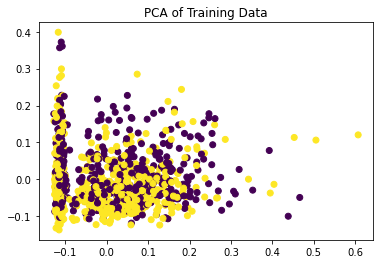

In [43]:
# import the PCA class from sklearn.decomposition
# Create a new instance of the PCA class with 2 components
# Fit the PCA on the training data

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
## pca = PCA(n_components=2)
## X_train_pca = pca.fit_transform(X_train)
pca = PCA(n_components=2)
subset_X = X_train_df[:1000]
subset_y = y_train[:1000]
X_train_pca = pca.fit_transform(subset_X)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=subset_y, cmap='viridis')
plt.title('PCA of Training Data')
plt.show()
## plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
## plt.legend()
## plt.title('PCA of Training Data')
## plt.show()

(1000, 10000) (1000,)


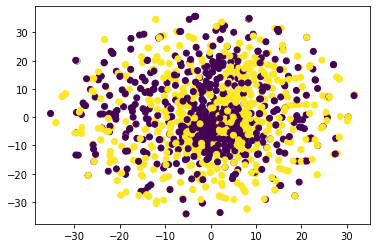

In [46]:
# import the TSNE class from sklearn.manifold
# Create a new instance of the TSNE class with 2 components
# Fit the TSNE on the training data
# Use the random state of 42
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
# subset_X = X_train_df[:1000]
# subset_y = y_train[:1000]
print(subset_X.shape, subset_y.shape)
X_train_tsne = tsne.fit_transform(subset_X)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:1000, 1], c=subset_y, cmap='viridis')
# plt.title('t-SNE of Training Data')
# plt.show()


In [47]:
# Use the following code to compare the time taken for PCA and t-SNE training time
# create a subset of the training data that contains only the first 1000 rows
# run the PCA and t-SNE fit functions on the subset

from time import time




start_time = time()

# Run fit t-SNE
TSNE(n_components=2, random_state=42).fit_transform(subset_X)

end_time = time()
print(f"Time taken for t-SNE: {end_time - start_time:.8f} seconds")

start_time = time()

PCA(n_components=2).fit_transform(subset_X)
# Run fit PCA



end_time = time()
print(f"Time taken for PCA: {end_time - start_time:.8f} seconds")


Time taken for t-SNE: 7.98094797 seconds
Time taken for PCA: 0.47206497 seconds


In [48]:
# Run the same test on a subset of 10000 rows
subset_X = X_train_df[:10_000]


start_time = time()

# Run fit t-SNE
TSNE(n_components=2, random_state=42).fit_transform(subset_X)

end_time = time()
print(f"Time taken for t-SNE: {end_time - start_time:.8f} seconds")

start_time = time()

PCA(n_components=2).fit_transform(subset_X)
# Run fit PCA



end_time = time()
print(f"Time taken for PCA: {end_time - start_time:.8f} seconds")



Time taken for t-SNE: 141.17522812 seconds
Time taken for PCA: 5.71748710 seconds


In [49]:
# Q8:
# 1. What is the difference in time taken between the two methods?
# the difference is that t-SNE is slower than PCA
# 2. What is the difference in time taken between the 1000 and 10000 row subsets?
# the difference is that the time taken for both t-SNE and PCA is larger for the 10000 rows subset, and super slow 
# 3. Explain the difference in time taken between the two methods
# t-SNE is slower than PCA because it is a non-linear method, and it is computationally expensive

In [52]:
# write a new python code based on all the above code
# 1. Use the train test split function to split the data into training and testing data by 30% for testing
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3, random_state=42)
# 2. Use the TfidfVectorizer to vectorize the data with the top 100000 features
tf = TfidfVectorizer(max_features=100_000, stop_words='english')
# 3. Fit the vectorizer on the training data
tf.fit(X_train)
# 4. Transform the training and testing data
train_sparse = tf.transform(X_train)
# 5. Use the PCA class to reduce the dimensions of the data to 2 components
pca = PCA(n_components=2)
# 6. Fit the PCA on the a subset of 100000
subset_X = train_sparse[:100_000]
subset_X = subset_X.toarray()
# 6. Create a t-SNE instance with 2 components and a random state of 42
tsne = TSNE(n_components=2, random_state=42)
# 7. Fit the t-SNE on the training data
X_train_tsne = tsne.fit_transform(subset_X)
# 8. Print the time taken for the PCA and t-SNE training time
start_time = time()
PCA(n_components=2).fit_transform(subset_X)
end_time = time()
print(f"Time taken for PCA: {end_time - start_time:.8f} seconds")
start_time = time()
TSNE(n_components=2, random_state=42).fit_transform(subset_X)
end_time = time()



In [51]:
# Q9:
# What is the difference in time taken between the two methods?
# the difference is that t-SNE is slower than PCA
# How practical is it to use t-SNE for dimensionality reduction on large datasets?
# it is depend if you only need to do this once, then it is practical, but if you need to do this multiple times, then it is not practical

In [ ]:
# Q10:
# Check the two plots, which method do you think is better to provide more speration between the classes?